# Detection Malicious URL Using ML Models

# **Context**
Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. We have collected this dataset to include a large number of examples of Malicious URLs so that a machine learning-based model can be developed to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through inteinternet.

# **Content**
we have collected a huge dataset of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. Figure 2 depicts their distribution in terms of percentage. As we know one of the most crucial tasks is to curate the dataset for a machine learning project. We have curated this dataset from five different sources.

For collecting benign, phishing, malware and defacement URLs we have used [URL dataset (ISCX-URL-2016)](https://www.unb.ca/cic/datasets/url-2016.html) For increasing phishing and malware URLs, we have used [Malware domain black list dataset](http://www.malwaredomains.com/wordpress/?page_id=66). We have increased benign URLs using [faizan git repo](https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data) At last, we have increased more number of phishing URLs using [Phishtank dataset](https://www.phishtank.com/developer_info.php) and [PhishStorm dataset](https://research.aalto.fi/en/datasets/phishstorm--phishing--legitimate-url-dataset(f49465b2-c68a-4182-9171-075f0ed797d5).html) As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

![url](https://user-images.githubusercontent.com/70811337/150021474-4ba64b34-1d09-427f-9cf6-25508571d18d.PNG)

<h2 style="width: 100%;
    margin: 0;
    padding: 0;
    text-align: center;">---- Table of contents ----</h2>

1. [Importing Libraries](#1)
2. [Load Dataset](#2)
3. [Meta information of Dataframe](#3)
4. [Checking for NaN values](#4)
5. [Feature Extraction](#5)
6. [Train & Test Split](#6)
7. [Training models](#7)
  <ul>
      <li>✔️ Decision Tree Classifier</li>
      <li>✔️ Random Forest Classifier</li>
      <li>✔️ AdaBoost Classifier</li>
      <li>✔️ KNeighbors Classifier</li>
      <li>✔️ SGD Classifier</li>
      <li>✔️ Extra Trees Classifier</li>
      <li>✔️ Gaussian NB</li>
  </ul>
8. [Final Report](#8)

In [2]:
# extract the domain name from a URL (Extract the top level domain (TLD) from the URL given).

!pip install tld

<a id="1"></a> <br>
# 📥 Importing Libraries

In [18]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from colorama import Fore  

from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

<a id="2"></a> <br>
# 🗃️ Load Dataset

In [91]:
data = pd.read_csv("malicious_phish.csv")
data.head(5)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Website **defacements** are the unauthorized modification of web pages, including the addition, removal, or alteration of existing content. These attacks are commonly carried out by hacktivists, who compromise a website or web server and replace or alter the hosted website information with their own messages.

**Phishing** is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message

**Malware** (short for “malicious software”) is a file or code, typically delivered over a network, that infects, explores, steals or conducts virtually any behavior an attacker wants. And because malware comes in so many variants, there are numerous methods to infect computer systems.

<a id="3"></a> <br>
# 📝 Meta information of Dataframe

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


<a id="4"></a>
# 🔎 Checking for NaN values

In [21]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [22]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [23]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

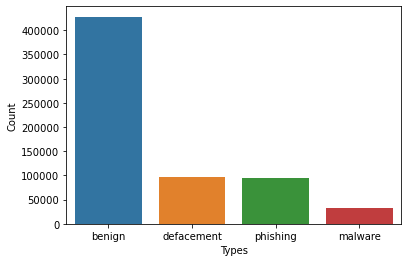

In [24]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

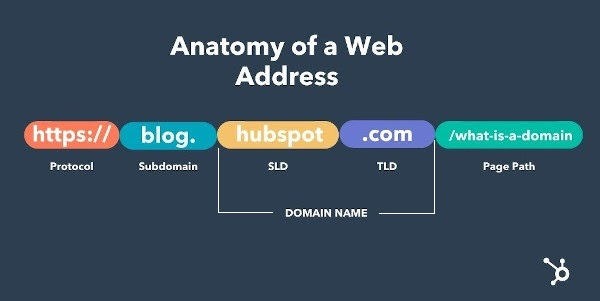

In [25]:
data['url'] = data['url'].replace('www.', '', regex=True)
data


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [26]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [27]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)
data.head(20)

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


<a id="5"></a> <br>
# 🦾 Feature Extraction

In [28]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [29]:
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [30]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [31]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [32]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [33]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [34]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [35]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0
    
    

    

# urlparse():This function parses a URL into six components, returning a 6-tuple. 
# This corresponds to the general structure of a URL. Each tuple item is a string. 
# The components are not broken up in smaller parts 
#(for example, the network location is a single string), and % escapes are not expanded.

In [36]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

In [37]:
data.head(10)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0


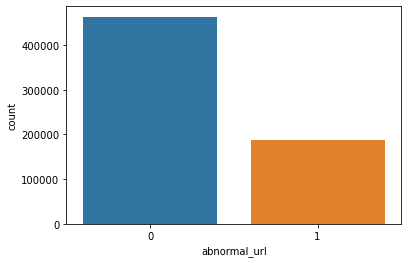

In [38]:
sns.countplot(x='abnormal_url', data=data);

In [39]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [40]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

In [41]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0


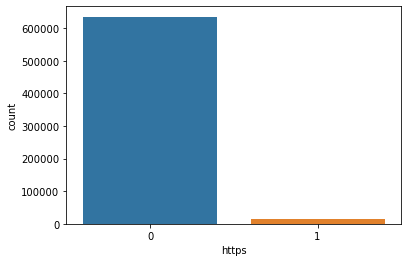

In [42]:
sns.countplot(x='https', data=data);

In [43]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [44]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

<h4>Counts the number of digit characters in a URL</h4>

<h4>Counts the number of letter characters in a URL</h4>

In [45]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,1,0,22


In [46]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# The isalpha() method returns True if all the characters are alphabet letters (a-z). 
# Example of characters that are not alphabet letters: (space)!

In [47]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

<h4>Checks to see whether URL contains a shortening service</h4>

In [48]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    

# A URL shortening service is a third-party website that converts that long URL to a short, 
# case-sensitive alphanumeric code. Simply put, this means that a URL shortening service takes 
# ridiculously long URLs (web addresses) and makes them short.

In [49]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

In [50]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,1,1,0,22,199,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,0,1,1,0,1,93,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,0,4,31,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,0,0,40,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,0,1,1,0,0,34,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,0,5,33,0


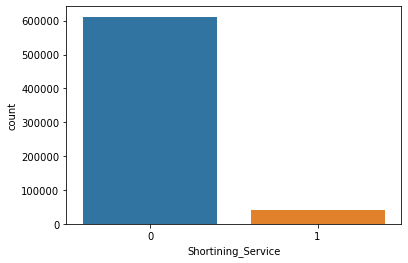

In [51]:
sns.countplot(x='Shortining_Service', data=data);

In [52]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [53]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [54]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0


In [55]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

<AxesSubplot:>

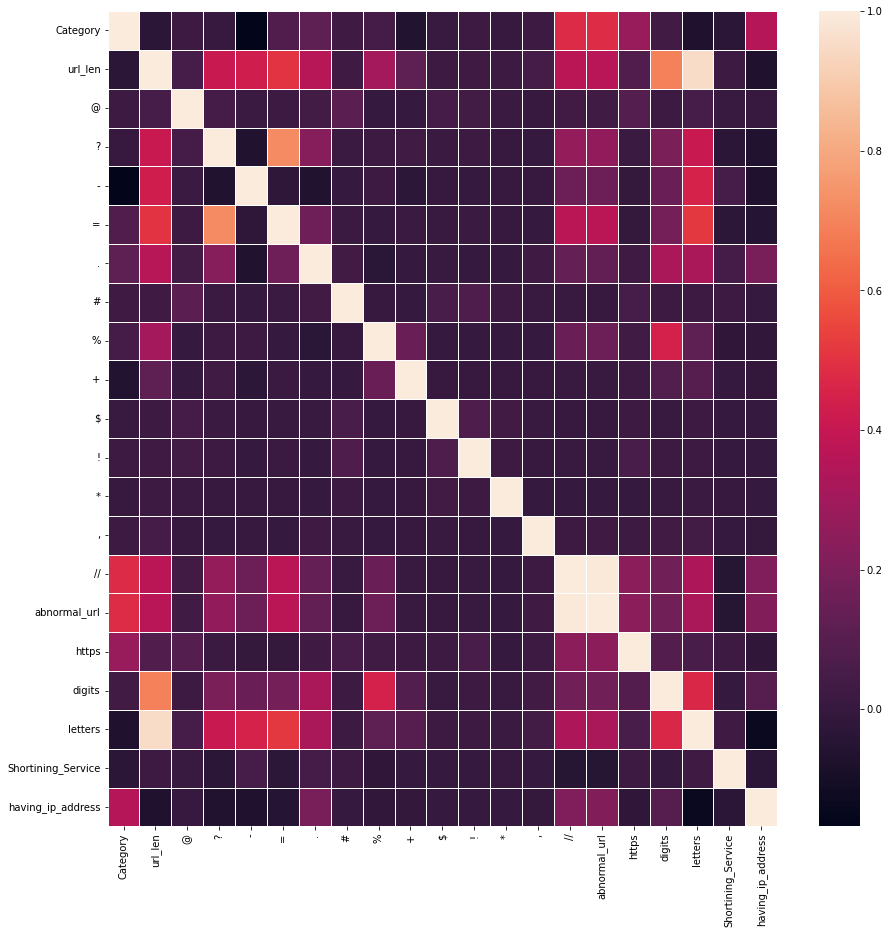

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [57]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [58]:
X

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13,0,0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29,0,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25,0,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,60,0,0
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,12,21,0,0
651187,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,7,29,1,0
651188,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,30,1,0
651189,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,36,0,0


In [59]:
y

0         2
1         0
2         0
3         1
4         1
         ..
651186    2
651187    2
651188    2
651189    2
651190    2
Name: Category, Length: 651191, dtype: int64

<a id="6"></a> <br>
# ✂️ Train & Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
X_train

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
510482,31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,26,0,0
194358,86,0,0,7,0,1,0,0,0,0,0,0,0,1,1,0,6,65,0,0
611258,90,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,6,73,0,0
417382,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,0
225565,80,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,41,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,29,0,0
437782,21,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,18,0,0
620104,44,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8,27,0,0
203245,56,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,48,0,0


In [62]:
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
238731,96,0,1,1,5,2,0,0,0,0,0,0,0,1,1,0,2,76,0,0
309364,84,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,13,59,0,0
170638,83,0,0,13,0,2,0,0,0,0,0,0,0,1,1,0,31,30,0,0
246063,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0
466287,39,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,5,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348509,78,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,4,58,0,0
500295,28,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,25,0,0
53597,82,0,1,0,4,2,0,0,0,0,0,0,0,1,1,0,4,63,0,0
26012,26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,22,0,0


In [63]:
y_train.unique()

array([0, 2, 3, 1], dtype=int64)

In [64]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
348509    1
500295    0
53597     1
26012     0
212458    0
Name: Category, Length: 130239, dtype: int64

<a id="7"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/32/4149/4149680.png"/> Training models

In [65]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [70]:
!pip install pycm

In [71]:
from pycm import ConfusionMatrix

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  90.92%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85565
           1       0.93      0.96      0.94     19319
           2       0.80      0.57      0.66     18805
           3       0.94      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.90      0.85      0.87    130239
weighted avg       0.90      0.91      0.90    130239

             Confusion_matrix 
Predict     0           1           2           3           
Actual
0           83260       302         1929        74          

1           320         18559       357         83          

2           7060        912         10643       190         

3           69          211         323         5947        





Overall Statistics : 

95% CI    

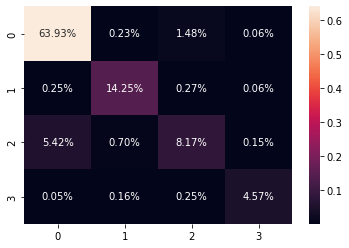

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.48%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 
Predict     0           1           2           3           
Actual
0           83735       214         1574        42          

1           285         18652       309         73          

2           7002        872         10812       119         

3           65          197         342         59

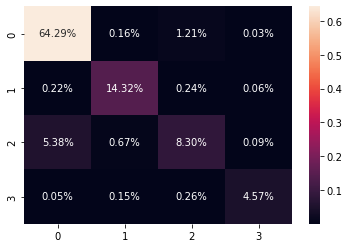

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  82.01%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85565
           1       0.82      0.89      0.85     19319
           2       0.45      0.15      0.22     18805
           3       0.91      0.46      0.61      6550

    accuracy                           0.82    130239
   macro avg       0.75      0.62      0.65    130239
weighted avg       0.78      0.82      0.78    130239

             Confusion_matrix 
Predict     0           1           2           3           
Actual
0           83766       964         800         35          

1           961         17234       1077        47          

2           13989       1817        2766        233         

3           917         1032        1561     

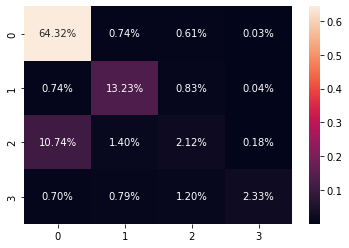

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 


KeyboardInterrupt: 

In [77]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cm = ConfusionMatrix(actual_vector=y_test,predict_vector=pred)
    print(cm)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [151]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 256)               5376      
                                                                 
 dense_95 (Dense)            (None, 128)               32896     
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 16)                528       
                                                                 
 dense_99 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-tra

NameError: name 'model' is not defined

In [ ]:
history_dict = history.history
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

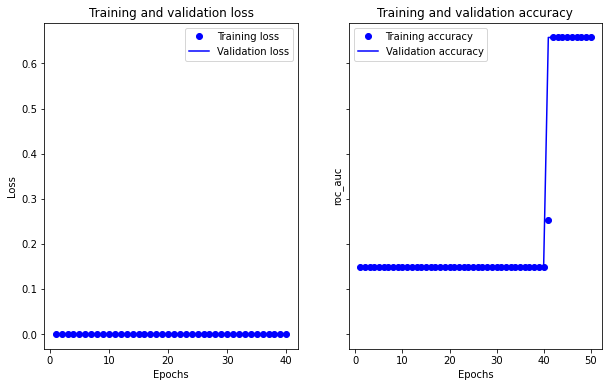

In [ ]:
epochs = range(1, len(accuracy) + 1)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.plot(epochs, loss, 'bo', label='Training loss')
ax1.plot(epochs, validation_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, accuracy, 'bo', label='Training accuracy')
ax2.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('roc_auc')
ax2.legend()

plt.show()

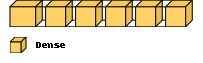

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_87 (Dense)            (None, 20)                420       
                                                                 
 dense_88 (Dense)            (None, 20)                420       
                                                                 
 dense_89 (Dense)            (None, 18)                378       
                                                                 
 dense_92 (Dense)            (None, 20)                380       
                                                                 
 dense_93 (Dense)            (None, 20)                420       
                                                                 
Total params: 2,018
Trainable params: 2,018
Non-trainable p

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, y_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/50
6512/6512 [==============================] - 10s 1ms/step - loss: 3.9678 - accuracy: 0.0232 - val_loss: 0.7650 - val_accuracy: 0.1022
Epoch 2/50
6512/6512 [==============================] - 11s 2ms/step - loss: 4.6187 - accuracy: 0.0538 - val_loss: 6.4585 - val_accuracy: 0.0000e+00
Epoch 3/50
6512/6512 [==============================] - 11s 2ms/step - loss: 3.0269 - accuracy: 0.0455 - val_loss: -0.4151 - val_accuracy: 0.0183
Epoch 4/50
6512/6512 [==============================] - 11s 2ms/step - loss: -0.5008 - accuracy: 0.0435 - val_loss: -0.6552 - val_accuracy: 0.0479
Epoch 5/50
6512/6512 [==============================] - 10s 2ms/step - loss: -0.3606 - accuracy: 0.0504 - val_loss: -0.6175 - val_accuracy: 0.0659
Epoch 6/50
6512/6512 [==============================] - 10s 2ms/step - loss: -0.7650 - accuracy: 0.1420 - val_loss: -1.2331 - val_accuracy: 0.6335
Epoch 7/50
6512/6512 [==============================] - 10s 2ms/step - loss: 3.5052 - accuracy: 0.4908 - val_loss: 6.29

In [ ]:
history_dict = history.history
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

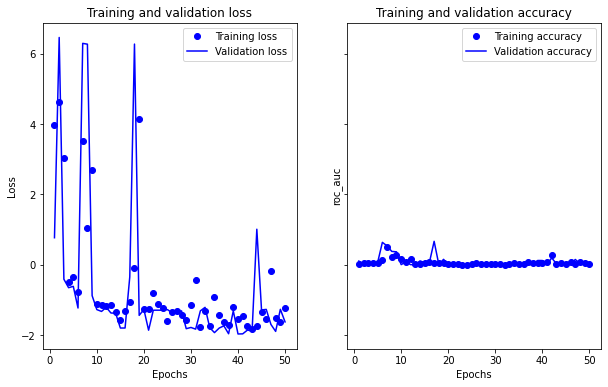

In [ ]:
epochs = range(1, len(accuracy) + 1)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.plot(epochs, loss, 'bo', label='Training loss')
ax1.plot(epochs, validation_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, accuracy, 'bo', label='Training accuracy')
ax2.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('roc_auc')
ax2.legend()

plt.show()

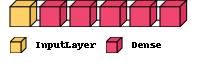

In [ ]:
visualkeras.layered_view(autoencoder, legend=True)

In [ ]:
X_test

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

### Testing the Model

In [ ]:
def URL_Converter(urls):
    data= pd.DataFrame()
    data['url'] = pd.Series(urls)

    
    data['url_len'] = data['url'].apply(lambda x: len(str(x)))
    data['domain'] = data['url'].apply(lambda i: process_tld(i))
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature:
        data[a] = data['url'].apply(lambda i: i.count(a))  
    data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
    data['https'] = data['url'].apply(lambda i: httpSecure(i))
    data['digits']= data['url'].apply(lambda i: digit_count(i))
    data['letters']= data['url'].apply(lambda i: letter_count(i))
    data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
    data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
    print(data.columns)
    X = data.drop(['url','domain'],axis=1)
    
    return X
    

In [ ]:
urls= ['diaryofagameaddict.com',
'espdesign.com.au',
'iamagameaddict.com',
'kalantzis.net',
'slightlyoffcenter.net',
'toddscarwash.com',
'tubemoviez.com',
'ipl.hk',
'crackspider.us/toolbar/install.php?pack=exe',
'pos-kupang.com/',
'rupor.info',
'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
'officeon.ch.ma/office.js?google_ad_format=728x90_as',
'sn-gzzx.com',
'sunlux.net/company/about.html',
'outporn.com',
'timothycopus.aimoo.com',
'xindalawyer.com',
'freeserials.spb.ru/key/68703.htm',
'deletespyware-adware.com',
'orbowlada.strefa.pl/text396.htm',
'ruiyangcn.com',
'zkic.com',
'adserving.favorit-network.com/eas?camp=19320;cre=mu&grpid=1738&tag_id=618&nums=FGApbjFAAA',
'cracks.vg/d1.php',
'juicypussyclips.com',
'nuptialimages.com',
'andysgame.com',
'bezproudoff.cz',
'ceskarepublika.net',
'hotspot.cz',
'gmcjjh.org/DHL',
'nerez-schodiste-zabradli.com',
'nordiccountry.cz',
'nowina.info',
'obada-konstruktiwa.org',
'otylkaaotesanek.cz',
'pb-webdesign.net',
'pension-helene.cz',
'podzemi.myotis.info',
'smrcek.com',
'spekband.com',
'm2132.ehgaugysd.net/zyso.cgi?18',
'webcom-software.ws/links/?153646e8b0a88',
'worldgymperu.com',
'zgsysz.com',
'oknarai.ru',
'realinnovation.com/css/menu.js']

In [ ]:
test_data= URL_Converter(urls)

In [ ]:
models

In [ ]:
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(test_data)
    print(pred)

### NLP Modelling

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from textblob import TextBlob

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
import html
import unicodedata

import spacy
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re as regexp
import string

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

from tqdm.notebook import tqdm
from transformers import BertTokenizer
from transformers import TFBertModel
from tensorflow.keras.layers import Dense, Flatten
import visualkeras

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import keras
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)
keras.backend.set_session(sess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skgha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skgha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\skgha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\skgha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [93]:
stemmer = PorterStemmer() # Initializing the stemmer
lemmatizer = WordNetLemmatizer() # Initializing lemmatizer


def special_characters(comment):
    sc = regexp.compile(r'  +')
    a = comment.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '\\').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return sc.sub(' ', html.unescape(a))


def lowercase(comment):
    return comment.lower()


def remove_non_ascii(comment):
    return regexp.sub(r'[^\x00-\x7f]',r'', comment)

def punctuation(comment):
    translator = str.maketrans('', '', string.punctuation)
    return comment.translate(translator)

def numbers(comment):
    return regexp.sub(r'\d+', '', comment)

def spelling_correction(comment):
    return TextBlob(comment).correct()

def stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]


def stem_words(words):
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def texttowords(comment):
    return word_tokenize(comment)


In [94]:
def clean_text(comment):
    #comment = special_characters(comment)
    #comment = lowercase(comment)
    #comment = punctuation(comment)
    #comment = numbers(comment)
    #comment = remove_non_ascii(comment)
    words = texttowords(comment)
    # comment = spelling_correction(comment)
    words = stopwords(words, stop_words)
    # As lemmatization includes Stemming
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)
    return ''.join(words)

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.type = le.fit_transform(data.type.values)

In [96]:
data['url'] = data['url'].apply(lambda x: clean_text(x))

In [97]:
data

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http : //www.garage-pirenne.be/index.php ? opt...,1
4,http : //adventure-nicaragua.net/index.php ? o...,1
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3
651188,www.gamespot.com/xbox360/action/deadspace/,3
651189,en.wikipedia.org/wiki/Dead_Space_ ( video_game ),3


In [98]:
x = data['url']
y = data['type']
y = np.asarray(y).astype("float64")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [99]:
X_train

510482                      census-online.us/view/SHOCKLEY/
194358    http : //pitchfork.com/reviews/albums/20299-or...
611258    www.rsc.org/delivery/_ArticleLinking/DisplayAr...
417382              pipl.com/directory/name/Gauthier/Judith
225565    slideshare.net/hmsgroup/hms-group-catalogue-fo...
                                ...                        
84434             veromi.com/BusinessDetailPg000006776.aspx
437782                                polymtl.academia.edu/
620104         cnn.com/2001/TECH/internet/03/07/coffee.pot/
203245    booking.com/hotel/ca/hilton-montreal-bonaventu...
100879    http : //www.824555.com/app/member/main.php ? ...
Name: url, Length: 520952, dtype: object

In [100]:
tokenizer = Tokenizer(num_words=1000, oov_token='UNK')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [101]:
X_train = pad_sequences(X_train,
                                maxlen=50, 
                                truncating='post', 
                                padding='post'
                               )
X_test = pad_sequences(X_test,
                            maxlen=50, 
                            truncating='post', 
                            padding='post'
                               )

In [102]:
model_LSTM = models.Sequential()
model_LSTM.add(layers.Embedding(vocab_size, 128, input_length=50))
model_LSTM.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_LSTM.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
model_LSTM.add(layers.Dense(64, activation='relu'))
model_LSTM.add(layers.Dense(32, activation='relu'))
model_LSTM.add(layers.Dense(16, activation='relu'))
model_LSTM.add(layers.Dense(1, activation='sigmoid'))


model_LSTM.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           59605376  
                                                                 
 lstm_2 (LSTM)               (None, 50, 512)           1312768   
                                                                 
 lstm_3 (LSTM)               (None, 128)               328192    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                

In [103]:
history = model_LSTM.fit(X_train,
                     y_train,
                    epochs=50,
                    batch_size=512,
                   validation_split=0.2)

Epoch 1/50
814/814 [==============================] - 480s 578ms/step - loss: -3057.3450 - accuracy: 0.7118 - val_loss: -16033.4502 - val_accuracy: 0.7599
Epoch 2/50
814/814 [==============================] - 235s 289ms/step - loss: -76205.2578 - accuracy: 0.6885 - val_loss: -197589.1719 - val_accuracy: 0.6920
Epoch 3/50
814/814 [==============================] - 240s 294ms/step - loss: -503352.5625 - accuracy: 0.6770 - val_loss: -1044053.1875 - val_accuracy: 0.7096
Epoch 4/50
814/814 [==============================] - 925s 1s/step - loss: -1863196.1250 - accuracy: 0.6831 - val_loss: -3031014.0000 - val_accuracy: 0.6894
Epoch 5/50
814/814 [==============================] - 537s 659ms/step - loss: -4747931.0000 - accuracy: 0.6888 - val_loss: -7046069.5000 - val_accuracy: 0.6909
Epoch 6/50
814/814 [==============================] - 1739s 2s/step - loss: -10441998.0000 - accuracy: 0.6869 - val_loss: -14587536.0000 - val_accuracy: 0.6910
Epoch 7/50
814/814 [==============================] 

KeyboardInterrupt: 

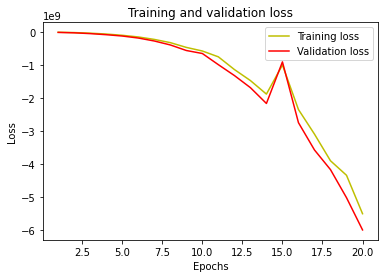

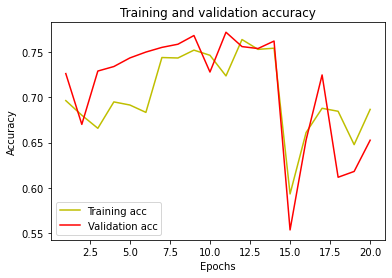

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding



model = Sequential()
model.add(Dense(256, input_dim = 20, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_split=0.2, batch_size = 128)

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, y_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2) 

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()